In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import zipfile
import os

In [11]:
# Define the path to the zip file and the CSV files within it
zip_file_path = r"C:\Users\holog\Downloads\house-prices-advanced-regression-techniques.zip"
train_csv_file_name = 'train.csv'
test_csv_file_name = 'test.csv'

# Extract the CSV files from the zip archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract(train_csv_file_name, 'extracted_data')
    zip_ref.extract(test_csv_file_name, 'extracted_data')

# Load the train dataset
train_data = pd.read_csv(os.path.join('extracted_data', train_csv_file_name))

# Load the test dataset
test_data = pd.read_csv(os.path.join('extracted_data', test_csv_file_name))

In [12]:
# Perform exploratory data analysis
print("Training Data Description Before Scaling:")
print(train_data.describe())

Training Data Description Before Scaling:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual   
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  \
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...   
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...  \
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904  

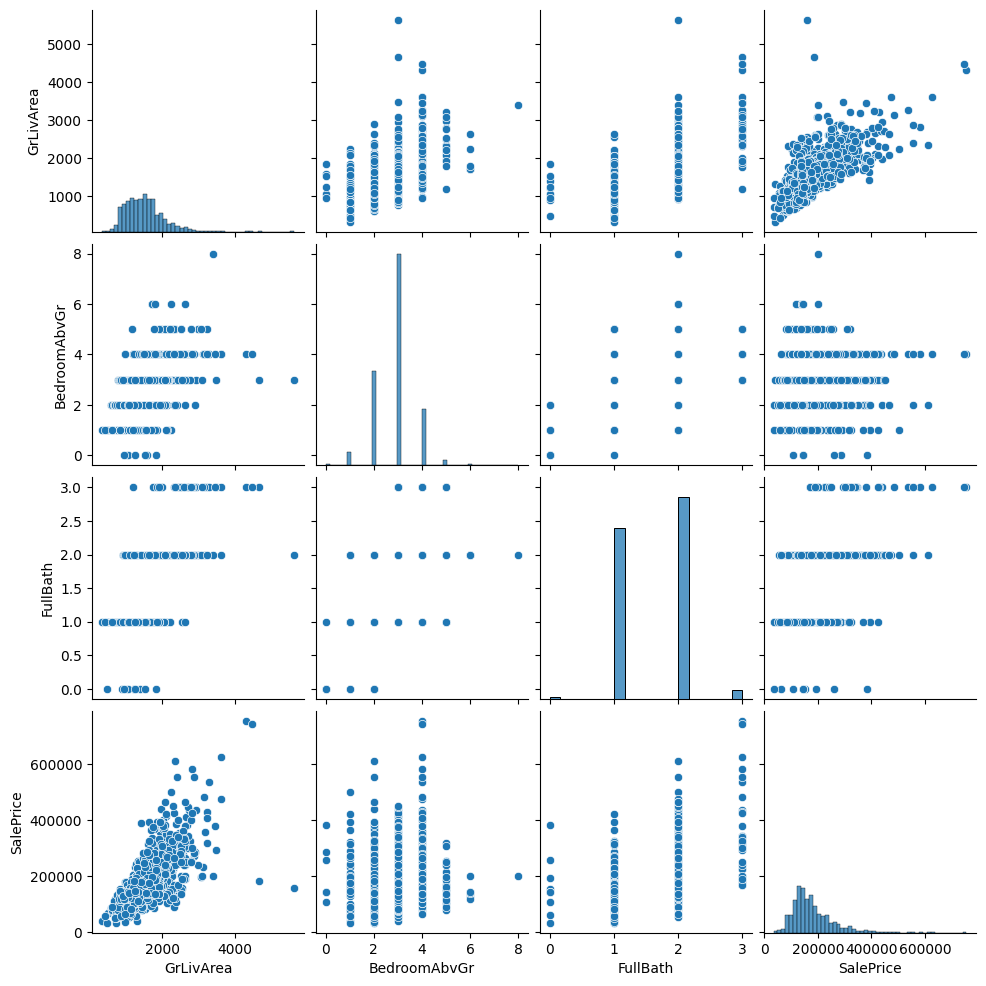

In [13]:
# Visualize relationships between features and the target variable
sns.pairplot(train_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']])
plt.show()

In [14]:
# Select relevant features and target variable
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

# Check for missing values in the training data
missing_train = train_data[features].isnull().sum()
print("Missing values in the training data before filling:")
print(missing_train)

Missing values in the training data before filling:
GrLivArea       0
BedroomAbvGr    0
FullBath        0
dtype: int64


In [15]:
# Extract features and target variable from the training data
X_train = train_data[features]
y_train = train_data[target]

# Handle missing values in the training data
X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())

# Log-transform the target variable to reduce skewness
y_train = np.log1p(y_train)

# Check for missing values in the test data
missing_test = test_data[features].isnull().sum()
print("Missing values in the test data before filling:")
print(missing_test)

Missing values in the test data before filling:
GrLivArea       0
BedroomAbvGr    0
FullBath        0
dtype: int64


In [16]:
# Extract features from the test data
X_test = test_data[features]

# Handle missing values in the test data
X_test = X_test.fillna(X_test.mean())

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Describe the scaled training data
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)
print("Training Data Description After Scaling:")
print(X_train_scaled_df.describe())

Training Data Description After Scaling:
          GrLivArea  BedroomAbvGr      FullBath
count  1.460000e+03  1.460000e+03  1.460000e+03
mean  -1.277517e-16  2.141362e-16  1.180182e-16
std    1.000343e+00  1.000343e+00  1.000343e+00
min   -2.249120e+00 -3.514952e+00 -2.841822e+00
25%   -7.347485e-01 -1.062465e+00 -1.026041e+00
50%   -9.797004e-02  1.637791e-01  7.897405e-01
75%    4.974036e-01  1.637791e-01  7.897405e-01
max    7.855574e+00  6.294997e+00  2.605522e+00


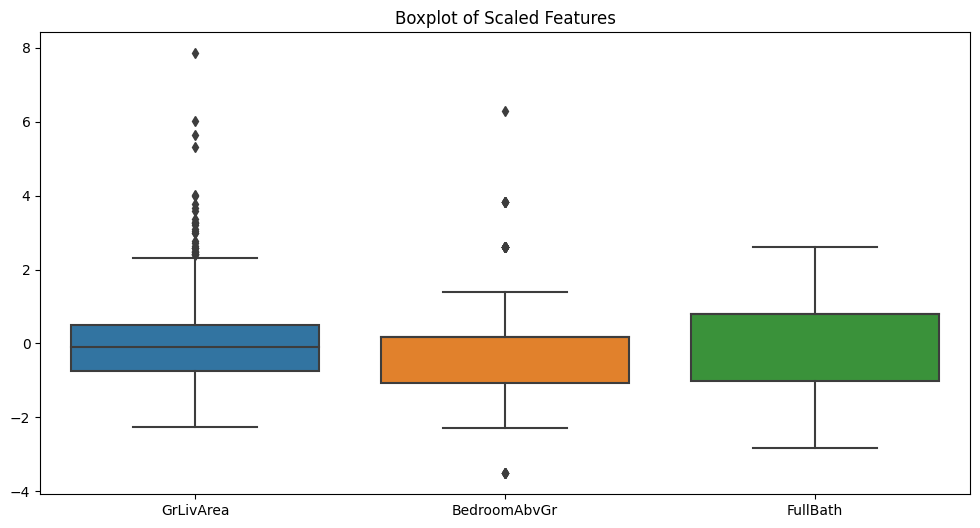

In [17]:
# Visualize the scaled features
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_scaled_df)
plt.title('Boxplot of Scaled Features')
plt.show()

In [18]:
# Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f'Cross-Validation RMSE: {cv_rmse.mean()}')

Cross-Validation RMSE: 0.2518616407546881


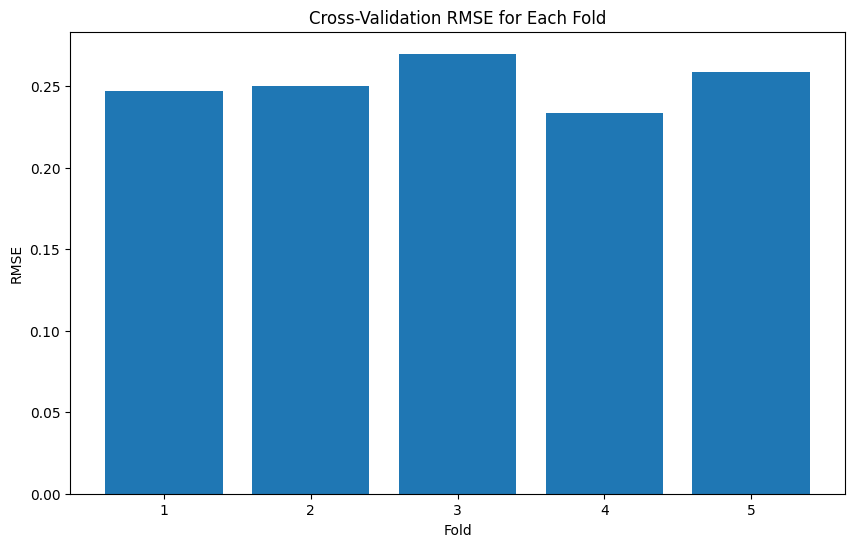

In [25]:
# Visualize cross-validation scores
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), cv_rmse)
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE for Each Fold')
plt.show()

In [26]:
# Make predictions on the test data
y_pred_test = model.predict(X_test_poly)

# Convert predictions back from log scale
y_pred_test = np.expm1(y_pred_test)

# Since test.csv does not have target values, we will not be able to calculate RMSE for it
# We can only display the predictions
print('Predictions for the test set:')
print(y_pred_test)

Predictions for the test set:
[112141.17565307 140988.72100493 195606.96433327 ... 121303.73992192
 110609.13239425 245151.51942666]


In [27]:
# Evaluate the model on a split of the train data (20% for testing)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_poly, y_train, test_size=0.2, random_state=42)
y_pred_split = model.predict(X_test_split)
mse = mean_squared_error(y_test_split, y_pred_split)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error on training split: {rmse}')

Root Mean Squared Error on training split: 0.25483064673347916


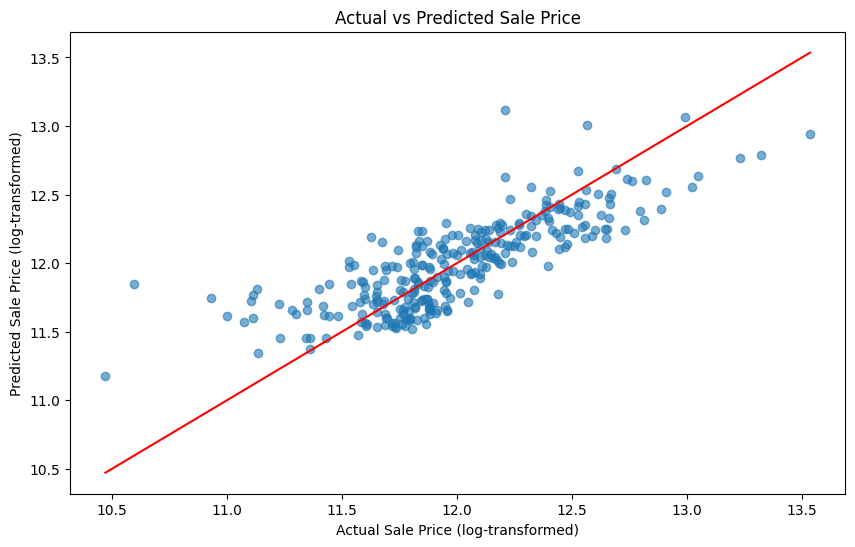

In [24]:
# Visualize the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_split, y_pred_split, alpha=0.6)
plt.xlabel('Actual Sale Price (log-transformed)')
plt.ylabel('Predicted Sale Price (log-transformed)')
plt.title('Actual vs Predicted Sale Price')
plt.plot([min(y_test_split), max(y_test_split)], [min(y_test_split), max(y_test_split)], color='red')
plt.show()

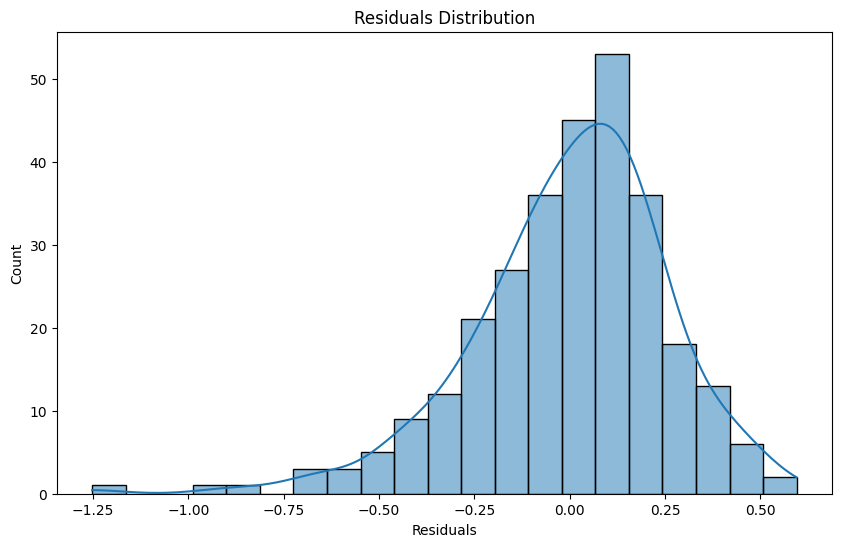

In [23]:
# Visualize residuals
residuals = y_test_split - y_pred_split
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()